# Data cleaning & merging
## Luis Natera
natera@hey.com

## Library imports

For the data cleanning and manipulation section I will use pandas and matplotlib for the visualizations.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Please load the users and activity tables into Python.

a. How many variables are in the datasets?

b. How many observations are in the datasets?


In [72]:
df_activites = pd.read_csv('../data/raw/activities.csv')
df_users = pd.read_csv('../data/raw/users.csv')

In [73]:
for df, name in zip([df_activites,df_users],['activities','users']):
    print(f'The dataset {name} has {len(df)} observations, and there are {len(df.columns)} variables, such variables are: {df.columns.values}\
     and the types of data are:\n{df.dtypes}\n')

The dataset activities has 22642 observations, and there are 3 variables, such variables are: ['UserId' 'Date' 'Revenue']     and the types of data are:
UserId       int64
Date        object
Revenue    float64
dtype: object

The dataset users has 5807 observations, and there are 5 variables, such variables are: ['UserId' 'Country' 'DOB' 'Gender' 'RegDate']     and the types of data are:
UserId      int64
Country    object
DOB        object
Gender     object
RegDate    object
dtype: object



## 2. How many:
a. Male users are in the dataset?

b. Female users are in the dataset?

c. For how many users is no gender information available?


In [74]:
df_gender = pd.DataFrame(df_users.groupby('Gender').count().rename(columns={'UserId':'Users'})['Users'])
print(f"There are:\n    + {df_gender.at['M','Users']} Male users\n    + {df_gender.at['F','Users']} Female users\n    + {df_gender.at[' ','Users']} Users withouth gender information")

There are:
    + 2909 Male users
    + 1417 Female users
    + 1481 Users withouth gender information


If there is no gender information available, please assume that the gender is male (“M”) for all further questions.

In [75]:
#Replace the empty values to M
df_users['Gender'] = df_users['Gender'].replace(r'^\s*$', 'M', regex=True)

In [85]:
df = df_activites.merge(df_users, left_on='UserId',right_on='UserId',how='outer')

## Merge the two datasets and:

- Calculate the days since registration for each activity.
- What is the total mean and median revenue generated per user (ie across all activities)? 
- How do you interpret the result?

In [103]:
print(f"There are {len(df) - len(df.dropna(subset=['Date','Revenue']))} users without activities")
df = df.dropna(subset=['Date','Revenue'])

There are 0 users without activities


### Days since registration. 
To calculate them I substract the registration date from the activity date.

In [106]:
df.loc[:,'Date'] = pd.to_datetime(df['Date'])
df.loc[:,'RegDate'] = pd.to_datetime(df['RegDate'])
df.loc[:,'days_since_reg'] = df.Date - df.RegDate
df.head(5)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,days_since_reg
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,332 days
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,341 days
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,347 days
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,348 days
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,349 days


## Revenue by users
Calculate the total, mean, and median revenue of users

In [119]:
df_user_revenue = pd.DataFrame()
df_user_revenue['total'] =  df.groupby('UserId')['Revenue'].sum().round(2)
df_user_revenue['mean'] =  df.groupby('UserId')['Revenue'].mean().round(2)
df_user_revenue['median'] =  df.groupby('UserId')['Revenue'].median().round(2)
df_user_revenue.sort_values('total',ascending=False)

,total,mean,median
UserId,,,
3200511,104917.00,2622.92,1765.00
3191433,101460.33,1719.67,1287.22
3320312,82190.12,622.65,373.76
3238560,61920.00,4763.08,3000.00
3217184,57700.00,1202.08,500.00
...,...,...,...
2983471,11.68,11.68,11.68
1862459,11.68,11.68,11.68
3141193,11.23,11.23,11.23


## Visualise the distribution of the revenues by user

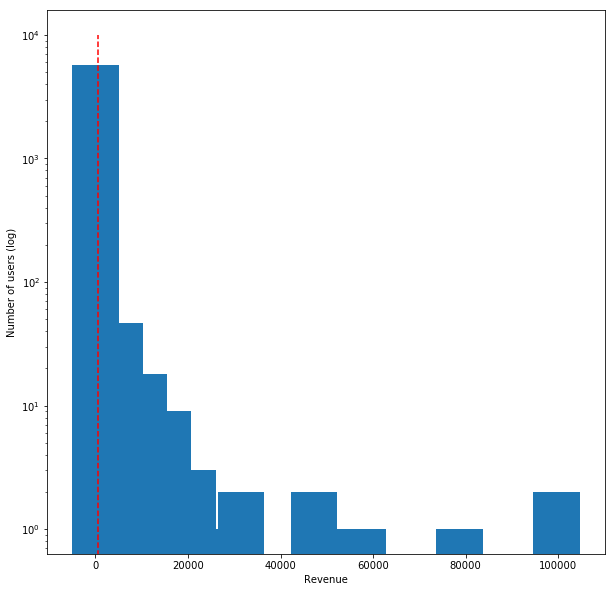

In [189]:
hist, bins = np.histogram(df_user_revenue['total'],bins=20)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.bar(bins[:-1],hist,10000,)
ax.vlines(df_user_revenue['total'].mean(),0,10000,color='red',linestyles='--')
ax.set_yscale('log')
ax.set_xlabel('Revenue')
ax.set_ylabel('Number of users (log)');

## What is the average week 1 revenue
The revenue generated by the user in their first week (ie within the first 7 days since registration)?

In [153]:
avg_week_rev = df[df['days_since_reg'] < pd.Timedelta(8, unit='days')]['Revenue'].mean().round(2)
print(f'The average week 1 revenue is {avg_week_rev}')

The average week 1 revenue is 134.57
